In [3]:
import joblib
import sys
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

sys.path.append('..') 

from src.utils import plot_confusion_matrix, plot_error_examples

print("Imports complete. Helper functions loaded.")

Imports complete. Helper functions loaded.


In [4]:
TEST_DATA_PATH = "../models/test_data.pkl"
X_test, y_test = joblib.load(TEST_DATA_PATH)

print(f"Test data loaded: X_test shape {X_test.shape}, y_test shape {y_test.shape}")

SVM_MODEL_PATH = "../models/svm_model.pkl"
LR_MODEL_PATH = "../models/lr_model.pkl"

svm_model = joblib.load(SVM_MODEL_PATH)
lr_model = joblib.load(LR_MODEL_PATH)

print("Models loaded successfully:")
print(f"- {svm_model}")
print(f"- {lr_model}")

Test data loaded: X_test shape (1750, 784), y_test shape (1750,)
Models loaded successfully:
- SVC()
- LogisticRegression(multi_class='multinomial', random_state=42, solver='saga')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
# --- SVM Evaluation ---
print("Evaluating SVM Model...")
y_pred_svm = svm_model.predict(X_test)

print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, title="SVM Confusion Matrix")

Evaluating SVM Model...

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       0.94      0.99      0.96       197
           2       0.96      0.91      0.94       175
           3       0.95      0.90      0.93       178
           4       0.94      0.95      0.95       171
           5       0.92      0.96      0.94       158
           6       0.97      0.98      0.97       172
           7       0.96      0.94      0.95       182
           8       0.95      0.94      0.94       171
           9       0.94      0.94      0.94       174

    accuracy                           0.95      1750
   macro avg       0.95      0.95      0.95      1750
weighted avg       0.95      0.95      0.95      1750



In [6]:
# --- Logistic Regression Evaluation ---
print("Evaluating Logistic Regression Model...")
y_pred_lr = lr_model.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix for LR
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, title="Logistic Regression Confusion Matrix")

Evaluating Logistic Regression Model...

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       172
           1       0.92      0.99      0.95       197
           2       0.96      0.83      0.89       175
           3       0.91      0.88      0.89       178
           4       0.93      0.87      0.90       171
           5       0.84      0.85      0.85       158
           6       0.89      0.96      0.92       172
           7       0.90      0.88      0.89       182
           8       0.88      0.89      0.88       171
           9       0.86      0.89      0.87       174

    accuracy                           0.90      1750
   macro avg       0.90      0.90      0.90      1750
weighted avg       0.90      0.90      0.90      1750



Analyzing SVM errors...


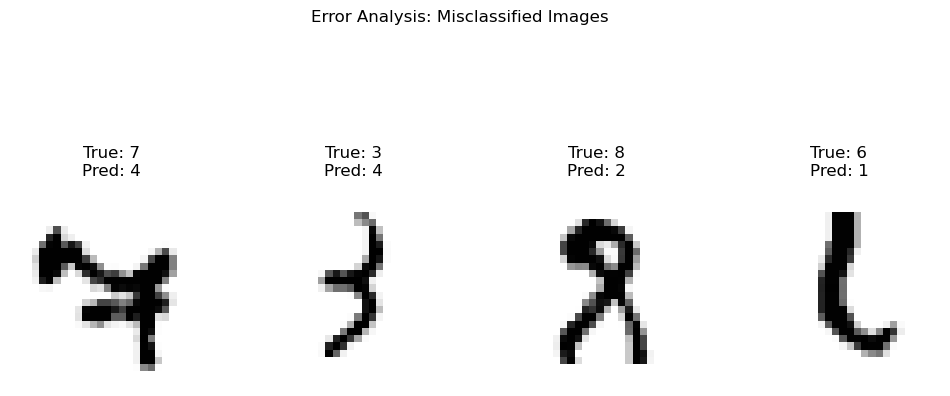

In [11]:
# --- Error Analysis (SVM) ---
print("Analyzing SVM errors...")

errors_mask = y_pred_svm != y_test
X_test_errors = X_test[errors_mask]
y_true_errors = y_test[errors_mask]
y_pred_errors_svm = y_pred_svm[errors_mask.values] 

# Plot examples
plot_error_examples(X_test_errors, y_true_errors, y_pred_errors_svm)